In [5]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = sklearn.datasets.fetch_california_housing(as_frame=True)
df = housing.frame  # Convert to DataFrame

# Display the first few rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [6]:
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

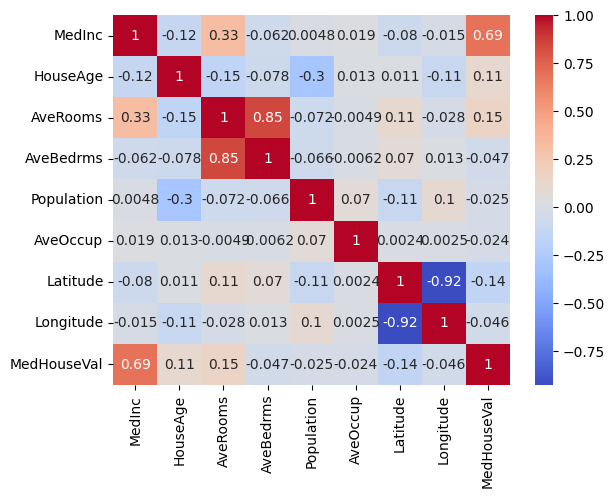

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

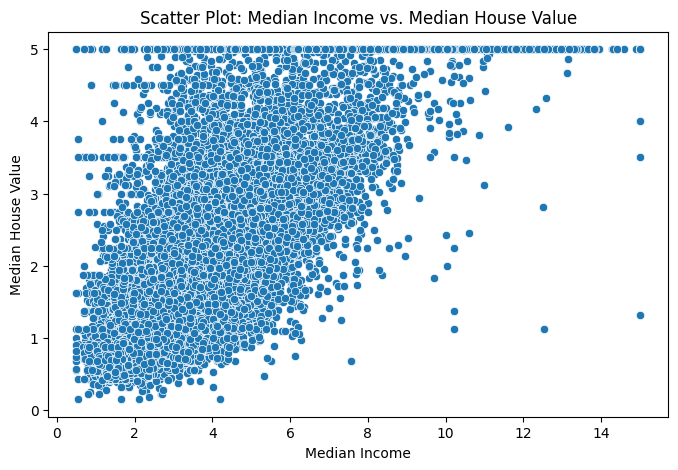

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter Plot: Median Income vs. Median House Value")
plt.show()

In [11]:
df.dropna(inplace=True)

In [14]:
X = df[['MedInc']]
y = df['MedHouseVal']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.7091157771765548


In [20]:
r2_score = model.score(X_test, y_test)
print(f'Model R² Score: {r2_score}')

Model R² Score: 0.45885918903846656


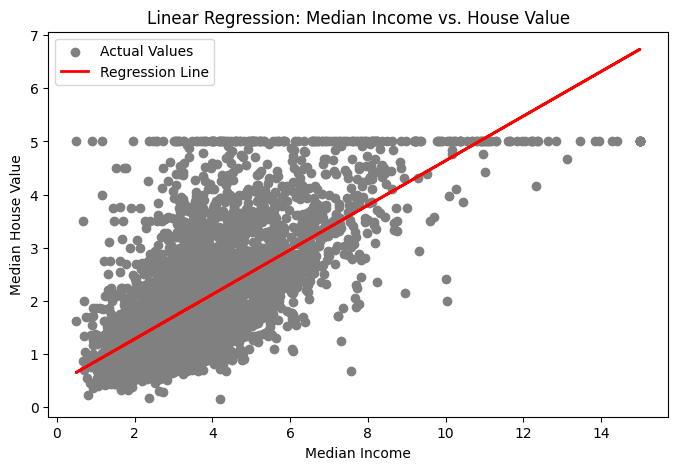

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='gray', label="Actual Values")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Linear Regression: Median Income vs. House Value")
plt.show()

In [22]:
# Sample input: Predict house value for a given median income
sample_input = np.array([[5.0]])  # Example: Median Income = 5.0
predicted_value = model.predict(sample_input)

print(f"Predicted Median House Value for Median Income = 5.0: {predicted_value[0]:.2f}")

# Print Model Accuracy (R² Score)
print(f"Model R² Score: {model.score(X_test, y_test):.4f}")


Predicted Median House Value for Median Income = 5.0: 2.54
Model R² Score: 0.4589


C:\Users\sarav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
